# Final Project - The e-commerce store daily income forecast

###  Introduction
<font color=black size=3>
>Nowaday,The need of e-commerce is rapidly increasing when people shopping or do other entertainments and it becomes even a threatening to the physical stores. Thus, the major reason of picking this retail topic is that we are driven by the curiosity to  whether or not the traditional costume retail will survive from the attack  from the new e-commerce.


### Method
<font color=black size=3>
>we use the python method in data cleaning and data explore. And we can use graph find some features in the dataset which can let us know the pinpoint of this dataset. And then, we decide to use RNN/LSTM[1] on forecast the store daily income. So we use python to calculate daily income and make this dataframe transfer to a time-series dataframe. Finally, we had a forecast result for daily income.


### Result
<font color=black size=3>
>In the first part of our project, we had forecast the store’s daily income. We use RMSE to evaluate the results, and the RMSE first result is 1.4149. And then, we try to use different active function to improve our result. So, we use tanh to contrast the elu. We found that the result is almost the same. And then, we know that cross function changing the parameter of loos function and check the score. Lower mean squared error means higher accuracy. So, after we use the cross function, the result is get improve than before about 7%. And then we use the another method which name is Gradient estimation. The result is improve 3% than original result. And then, we try to use network architecture and adding a masking layer to model. However, the results is also same like the original result.


### Reference:

    [1]https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
    [2]https://en.wikipedia.org/wiki/Long_short-term_memory
    [3]https://www.quora.com/How-does-ELU-activation-function-help-convergence-and-whats-its-advantages-over-ReLU-or-sigmoid-or-tanh-function
    [4]https://www.coursera.org/learn/neural-networks-deep-learning/lecture/yWaRd/logistic-regression-cost-function
    [5]https://en.wikipedia.org/wiki/Network_architecture

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, ttest_ind, chisquare, chi2_contingency, chi2

from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

import pylab as pl

sns.set_style("whitegrid")
sns.set_context("poster")

import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

/Users/yupei/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import Data and Data Overview

<font color=black size=4>
>We use Python notebook and the method which called “pandas.read_csv()” to read the csv file. And then, we transfer csv file into dataframe. We can see the dataset information and attribute in this graph. Also, we need to find out the features in this dataset.


In [2]:
#load the dataset
df_ecommerce = pd.read_excel("E-Retail.xlsx")
df_ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<font color=black size=4>
>In this graph, we can see that the overview of the original data. The dataset has 8 columns and each row is represent an order which has ‘Invoice NO’,‘Stock Code’, ‘Description’, ‘Quantity’, ‘Invoice Data’, ‘Unite price’, ‘Customer ID’, ‘Country’. For each of record, we need to check it if it has NaN and we has to cleaning these value.


In [3]:
df_ecommerce.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
#shape of our dataset
print("The shape of our e-commerce data is: ", df_ecommerce.shape)

('The shape of our e-commerce data is: ', (541909, 8))


In [5]:
# Use describe funtion to get the general properties of the dataset
print(df_ecommerce.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [6]:
uk = df_ecommerce[df_ecommerce['Country']=='United Kingdom']
#check the shape
uk.shape

(495478, 8)

In [7]:
non_unit=df_ecommerce[df_ecommerce['UnitPrice']==0]
non_unit.shape

(2515, 8)

In [8]:
#exploring the unique values of each attribute
print("Transactions: ", df_ecommerce['InvoiceNo'].nunique())
print("Products: ",df_ecommerce['StockCode'].nunique())
print("Customers:", df_ecommerce['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_ecommerce['CustomerID'].isnull().sum() * 100 / len(df_ecommerce),2),"%" )
print('Countries: ',df_ecommerce['Country'].nunique())

('Transactions: ', 25900)
('Products: ', 4070)
('Customers:', 4372)
('Percentage of customers NA: ', 24.0, '%')
('Countries: ', 38)


# Data preparation and cleaning


In [9]:
pre_ecommerce = df_ecommerce.drop('CustomerID',1) # Delete the coloumn

In [10]:
pre_ecommerce = pre_ecommerce.drop('Description',1) # Delete the coloumn

In [11]:
null_data = pre_ecommerce[pre_ecommerce.isnull().any(axis=1)]
null_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country


In [12]:
null_data = df_ecommerce[df_ecommerce.isnull().any(axis=1)]
null_data.shape

(135080, 8)

In [13]:
df_uk=uk
#Drop all missing value which is NA in the dataset
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
#remove canceled orders
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(354345, 8)

In [14]:
df_uk.index= range(len(df_uk)) # Re-order the dataset

In [15]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 354344
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


# Data Distribution

In [17]:
# sns.barplot(x="Quantity", y="StockCode", data=df_uk[df_uk["Quantity"]>12])
# plt.show()

In [18]:
sort_q_uk=df_uk.sort_values(["Quantity"], ascending=False) 
sort_q_uk.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
353987,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
33413,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
329110,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
272474,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
127974,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
54481,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
167854,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
29663,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
97767,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
281597,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom


<font color=black size=4>
>The data preparation is the important process which is use to get main features. In first part, we want to find the relation between the quantity, description  and the date. So, we use “sns.barplot()” to find which description has the most quantity in this dataset.

>We can see that the most part of quantity is ‘Paper’, ‘Storage’ and ‘Stickers’. However, the quantity can not to represent the value of product. So, we move on the ‘unit price’ of the product. 


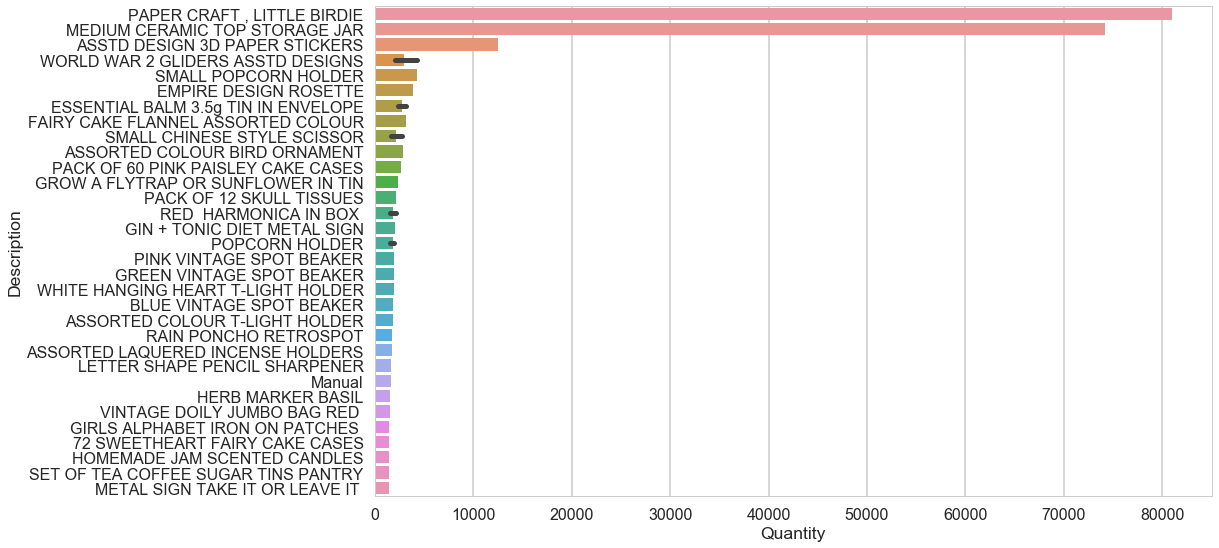

In [19]:
sns.barplot(x="Quantity", y="Description", data=sort_q_uk.head(50))
plt.show()

<font color=black size=4>
>In this graph, we can see that the first item(paper carft and little birdie) and the second item is has most quantity in this dataset. So we can now that people like buy these things. The other product looks like in averge quantity.

In [20]:
sort_p_uk=df_uk.sort_values(["UnitPrice"], ascending=False) 
sort_p_uk.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105801,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
238996,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
185202,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom
216128,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom
90221,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940.0,United Kingdom
347381,580727,DOT,DOTCOM POSTAGE,1,2011-12-05 17:17:00,1599.26,14096.0,United Kingdom
334036,579196,DOT,DOTCOM POSTAGE,1,2011-11-28 15:54:00,1526.76,14096.0,United Kingdom
305859,576339,DOT,DOTCOM POSTAGE,1,2011-11-14 15:27:00,1500.36,14096.0,United Kingdom
324552,578270,DOT,DOTCOM POSTAGE,1,2011-11-23 13:39:00,1270.06,14096.0,United Kingdom
297232,575607,DOT,DOTCOM POSTAGE,1,2011-11-10 12:37:00,908.16,14096.0,United Kingdom


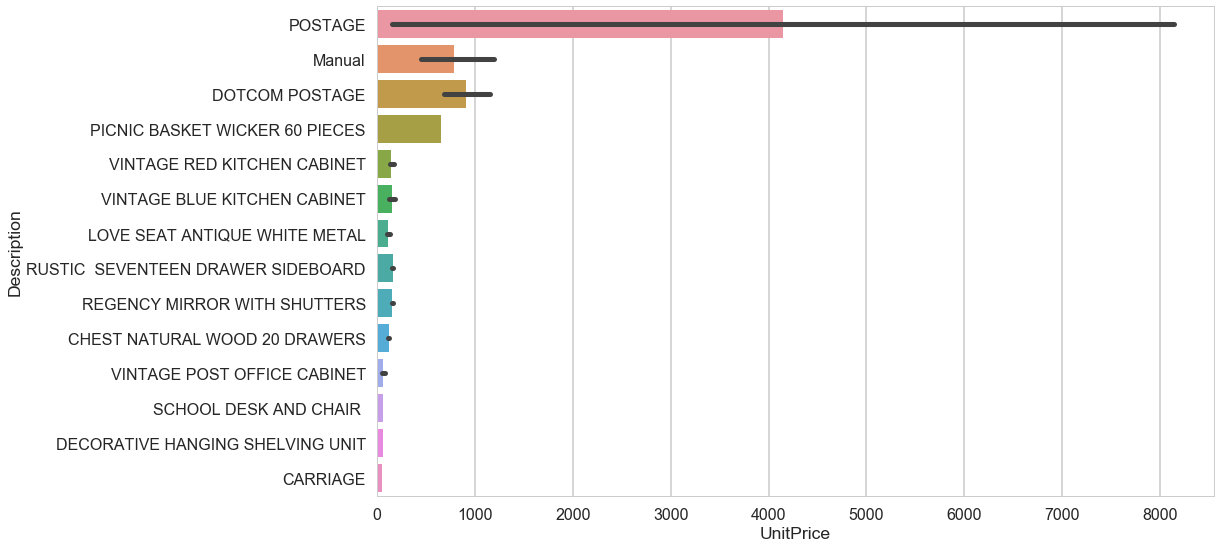

In [21]:
sns.barplot(x="UnitPrice", y="Description", data=sort_p_uk.head(200))
plt.show()

<font color=black size=4>
>So, we can see that  the ‘Postage’ has the highest ‘Unit price’. Focus on this point, we decide to find the features of the ‘Postage’. We filter all product which name is ‘Postage’ first and get a new dataset. 

>And then, we find only small part of the ‘Postage’ has the unit price is bigger than 8000. So, we remove these data from the dataset. Next, we use the ‘Unit price’ and ‘date’ to build a graph which can help us to find relationship between this two attribute.

In [22]:
uk_postage = df_uk[df_uk['Description']=='POSTAGE']
uk_postage

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
17252,538685,POST,POSTAGE,1,2010-12-14 09:39:00,15.00,15694.0,United Kingdom
80609,547941,POST,POSTAGE,1,2011-03-28 14:46:00,150.00,16692.0,United Kingdom
91704,549689,POST,POSTAGE,1,2011-04-11 13:40:00,4.95,15971.0,United Kingdom
105801,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
128135,554924,POST,POSTAGE,1,2011-05-27 12:54:00,4.00,12748.0,United Kingdom
139853,556519,POST,POSTAGE,1,2011-06-13 10:54:00,2.02,16794.0,United Kingdom
161790,559835,POST,POSTAGE,1,2011-07-13 10:08:00,15.00,13509.0,United Kingdom
171482,561057,POST,POSTAGE,1,2011-07-24 13:18:00,2.90,17935.0,United Kingdom
172774,561216,POST,POSTAGE,8,2011-07-25 17:04:00,15.00,14606.0,United Kingdom
173535,561368,POST,POSTAGE,1,2011-07-26 16:00:00,36.50,14866.0,United Kingdom


<font color=black size=4>
>In this graph, we can see the 8142.5 is extreme value, so we need to filter it out. Because the highest value will have impression on the prediction result.

In [23]:
uk_postage=uk_postage[uk_postage["UnitPrice"]<8000]

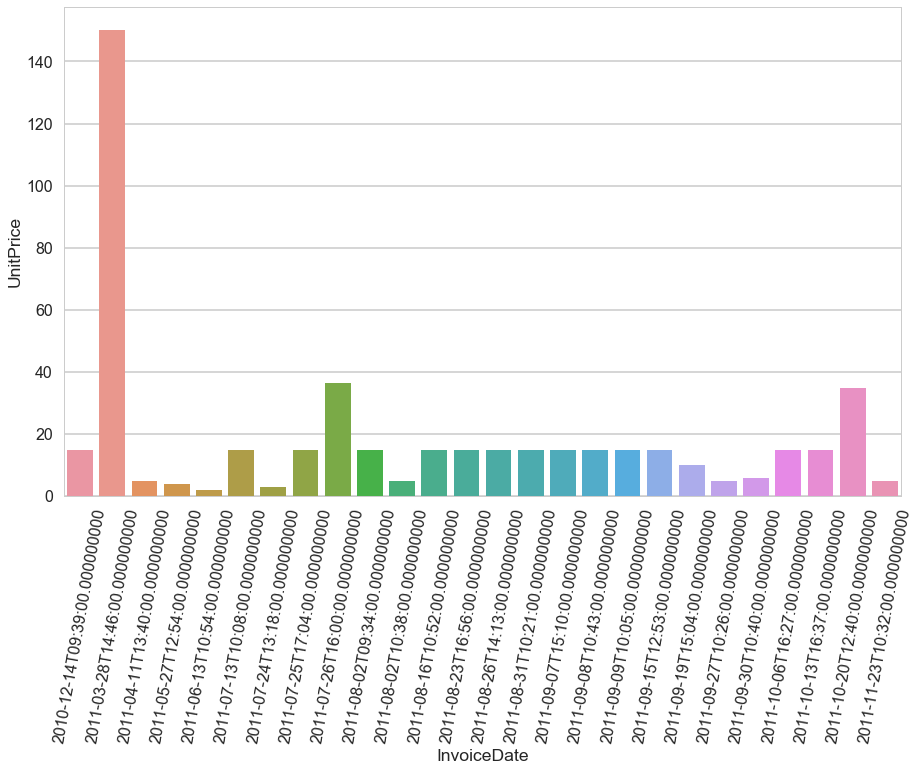

In [24]:
sns.barplot(x="InvoiceDate", y="UnitPrice", data=uk_postage)
plt.xticks(x="InvoiceDate",rotation=80)
plt.show()

<font color=black size=4>
>We found that except the ‘03-28’ all the ‘Unit price’ is between 0-40. Afterwards, we use method to set the ‘date’ to index and set the ‘Postage’ unit price in column 0. So, this is a time-series dataframe and we can use it to analysis the tendency for ‘unit price’ with ‘date’.


In [25]:
uk_postage['Quantity'].value_counts()

1    23
3     2
8     1
Name: Quantity, dtype: int64

In [26]:
uk_postage_series=uk_postage.iloc[:,[4,5]]
uk_postage_series.head()

,InvoiceDate,UnitPrice
17252,2010-12-14 09:39:00,15.00
80609,2011-03-28 14:46:00,150.00
91704,2011-04-11 13:40:00,4.95
128135,2011-05-27 12:54:00,4.00
139853,2011-06-13 10:54:00,2.02


In [27]:
uk_postage_series.index = uk_postage_series['InvoiceDate'].tolist()
uk_postage_series= uk_postage_series.drop('InvoiceDate', 1)
uk_postage_series

,UnitPrice
2010-12-14 09:39:00,15.00
2011-03-28 14:46:00,150.00
2011-04-11 13:40:00,4.95
2011-05-27 12:54:00,4.00
2011-06-13 10:54:00,2.02
2011-07-13 10:08:00,15.00
2011-07-24 13:18:00,2.90
2011-07-25 17:04:00,15.00
2011-07-26 16:00:00,36.50
2011-08-02 09:34:00,15.00


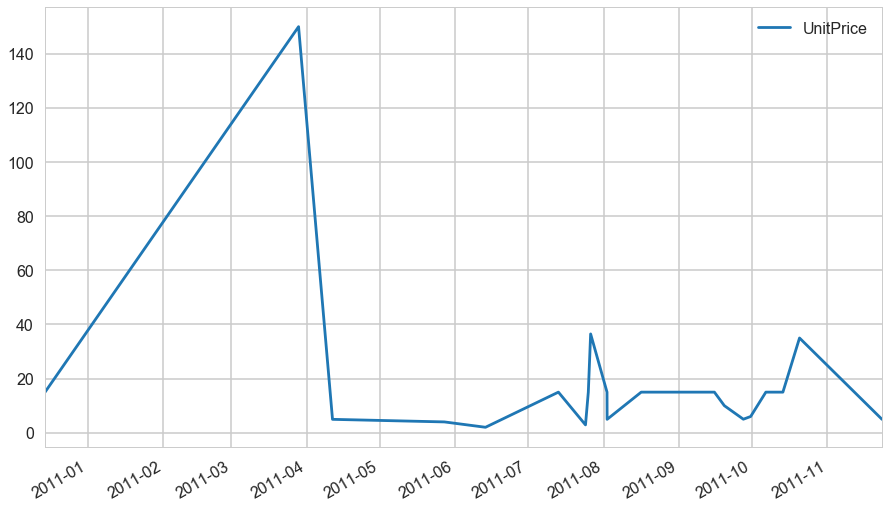

In [28]:
uk_postage_series.plot()

<font color=black size=4>
>In this graph,  we can see this is a sequence of data. It's not a seasonally adjusted time series. In first part we have a high point, and then the data is stationarity continuely.

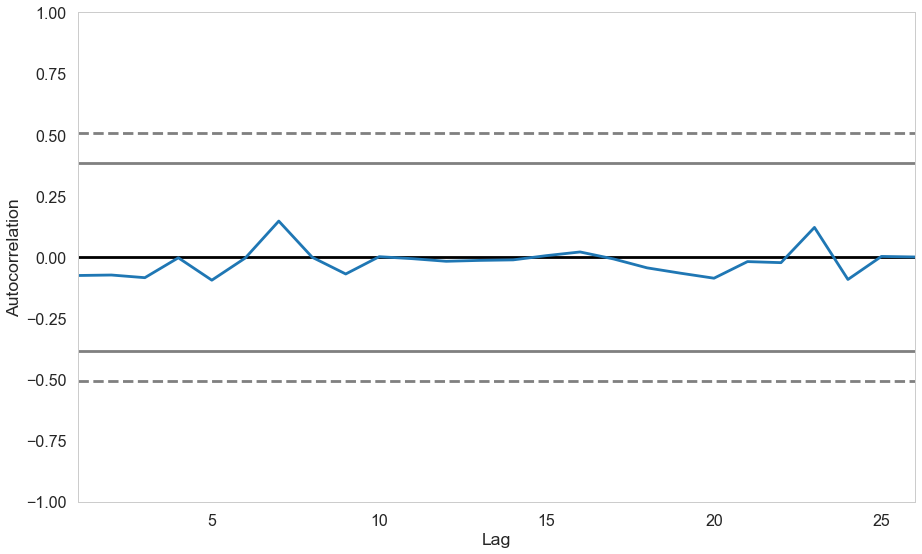

In [29]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(uk_postage_series['UnitPrice'])

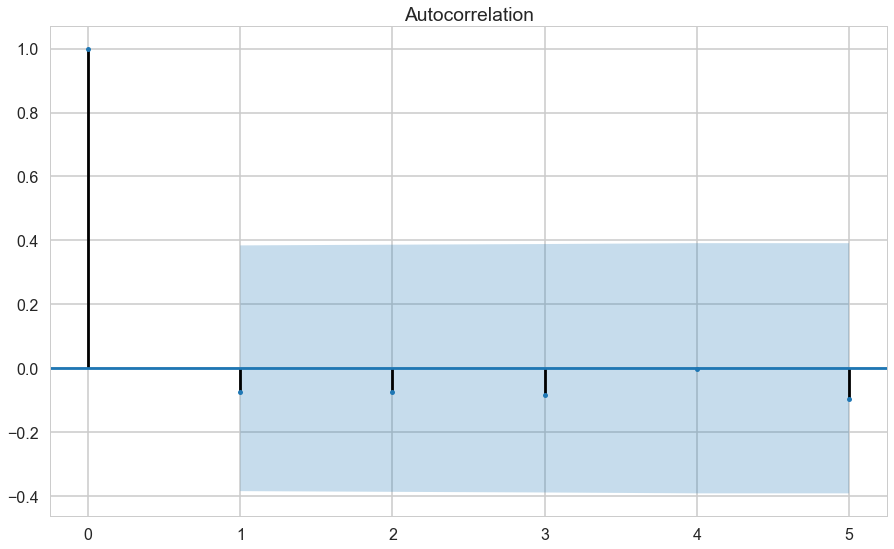

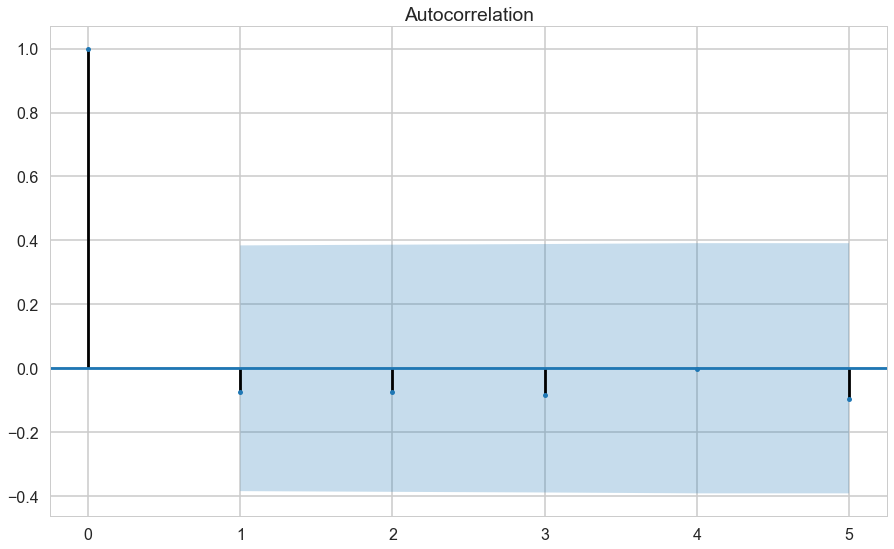

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(uk_postage_series['UnitPrice'], lags=5)

### In this sample, we can see that most part of this sample have negative correlation. It's between 0-20%.

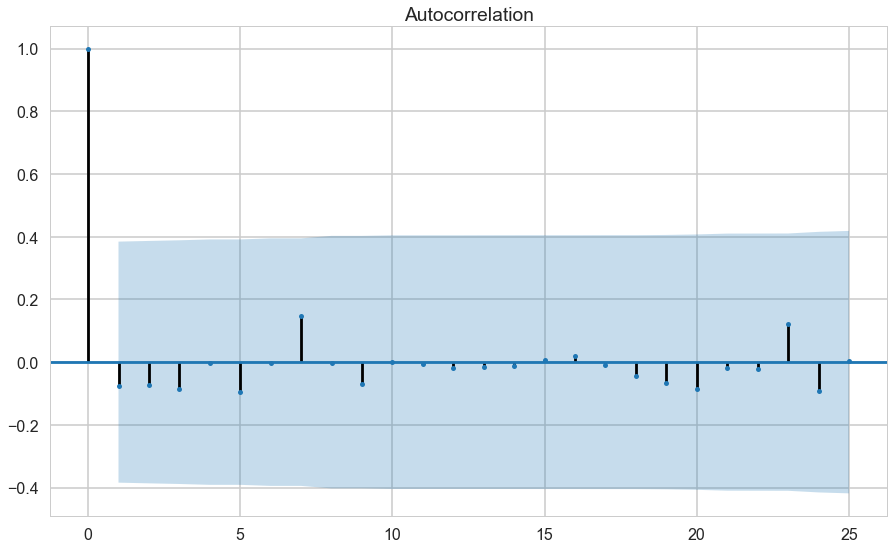

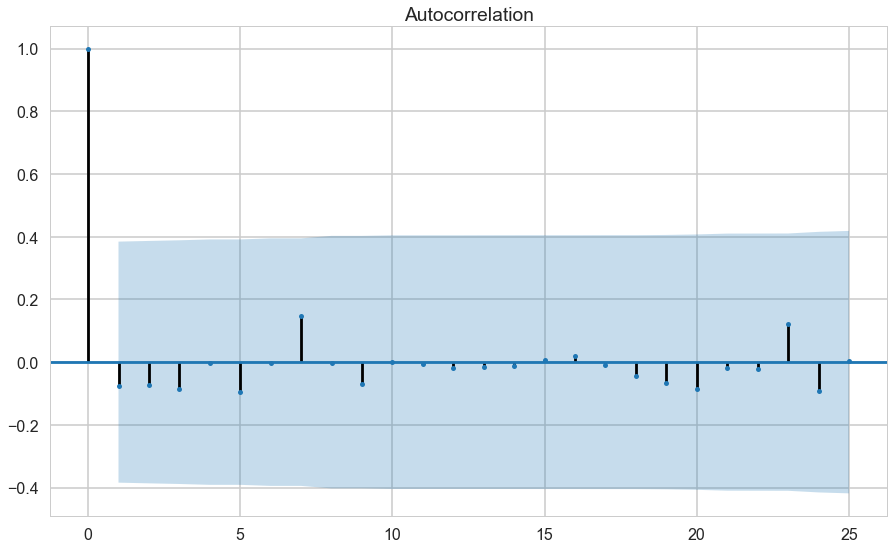

In [31]:
plot_acf(uk_postage_series['UnitPrice'], lags=25)

<font color=black size=4>
>In this graph, we can see that in this sample most part is negative correlation and few part is positive correlation. All these correlation is between 0-20%. We were not found more correlation in this type.

In [32]:
uk_postage_series_month = uk_postage_series['UnitPrice'].resample('M').mean()
# The 'M' indicates we want to resample by month. At the bottom of this post is a summary of different time frames.
# mean() is used to indicate we want to use the mean for the resample.
# The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
# What aggregation to perform: 'mean', 'median', 'sum', etc.
uk_postage_series_month

2010-12-31     15.000000
2011-01-31           NaN
2011-02-28           NaN
2011-03-31    150.000000
2011-04-30      4.950000
2011-05-31      4.000000
2011-06-30      2.020000
2011-07-31     17.350000
2011-08-31     13.325000
2011-09-30     11.571429
2011-10-31     21.666667
2011-11-30      4.950000
Freq: M, Name: UnitPrice, dtype: float64

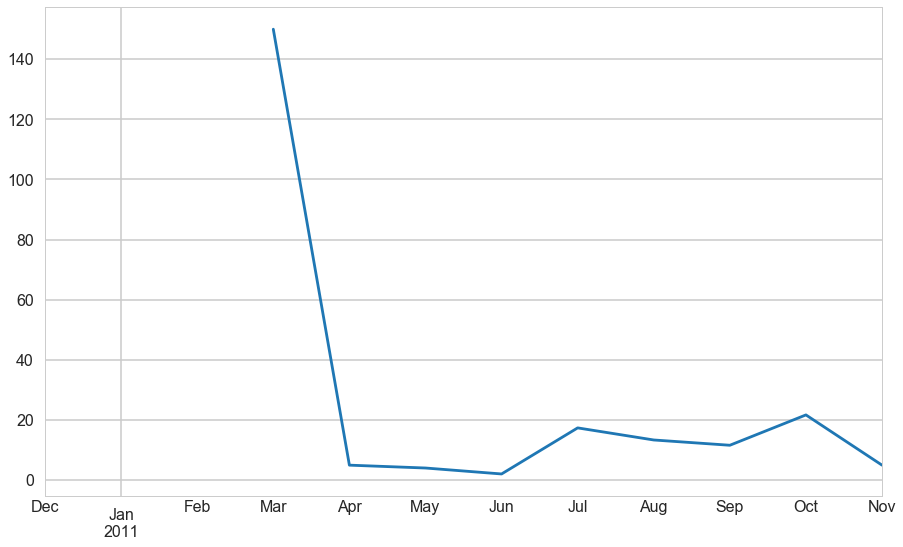

In [33]:
uk_postage_series_month.plot()


<font color=black size=4>
>In this graph, we can see that  the Feb is the highest income month, after Feb the unit price is fluctuate between 0-20.

------------------

In [34]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [35]:
uk_11=uk_postage.iloc[:,[4,5]]

In [36]:
uk_11

,InvoiceDate,UnitPrice
17252,2010-12-14 09:39:00,15.00
80609,2011-03-28 14:46:00,150.00
91704,2011-04-11 13:40:00,4.95
128135,2011-05-27 12:54:00,4.00
139853,2011-06-13 10:54:00,2.02
161790,2011-07-13 10:08:00,15.00
171482,2011-07-24 13:18:00,2.90
172774,2011-07-25 17:04:00,15.00
173535,2011-07-26 16:00:00,36.50
178217,2011-08-02 09:34:00,15.00


In [37]:
uk_112=np.array(uk_11)

In [38]:
uk_112[0][0].strftime("'%Y%m%d%H%M'")

"'201012140939'"

In [39]:
sort_q_uk = sort_q_uk.sort_values(["InvoiceDate"], ascending=True) 

In [40]:
sort_q_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom


In [41]:
sort_q_uk["StockCode"]=sort_q_uk["Quantity"]*sort_q_uk["UnitPrice"]

In [42]:
sort_q_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3,536365,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
0,536365,15.30,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
6,536365,25.50,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
4,536365,20.34,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,20.34,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,22.00,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
5,536365,15.30,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
8,536366,11.10,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
7,536366,11.10,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
13,536367,9.90,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom


In [43]:
pretest = sort_q_uk.iloc[:,[4,5]]

### To analysis everyday income, so we need calculate every order in one day.

In [44]:
pretest.reset_index(drop = True)

,InvoiceDate,UnitPrice
0,2010-12-01 08:26:00,3.39
1,2010-12-01 08:26:00,2.55
2,2010-12-01 08:26:00,4.25
3,2010-12-01 08:26:00,3.39
4,2010-12-01 08:26:00,3.39
5,2010-12-01 08:26:00,2.75
6,2010-12-01 08:26:00,7.65
7,2010-12-01 08:28:00,1.85
8,2010-12-01 08:28:00,1.85
9,2010-12-01 08:34:00,1.65


In [45]:
pretest.reset_index(drop=True)

,InvoiceDate,UnitPrice
0,2010-12-01 08:26:00,3.39
1,2010-12-01 08:26:00,2.55
2,2010-12-01 08:26:00,4.25
3,2010-12-01 08:26:00,3.39
4,2010-12-01 08:26:00,3.39
5,2010-12-01 08:26:00,2.75
6,2010-12-01 08:26:00,7.65
7,2010-12-01 08:28:00,1.85
8,2010-12-01 08:28:00,1.85
9,2010-12-01 08:34:00,1.65


In [46]:
pretest=np.array(pretest)

In [47]:
pretest

array([[Timestamp('2010-12-01 08:26:00'), 3.39],
       [Timestamp('2010-12-01 08:26:00'), 2.55],
       [Timestamp('2010-12-01 08:26:00'), 4.25],
       ...,
       [Timestamp('2011-12-09 12:49:00'), 7.08],
       [Timestamp('2011-12-09 12:49:00'), 1.25],
       [Timestamp('2011-12-09 12:49:00'), 8.95]], dtype=object)

In [48]:
pretest[1][0]

Timestamp('2010-12-01 08:26:00')

In [49]:
for i in range(0,354345):
        pretest[i][0] = pretest[i][0].strftime('%Y-%m-%d')

In [50]:
pretest

array([['2010-12-01', 3.39],
       ['2010-12-01', 2.55],
       ['2010-12-01', 4.25],
       ...,
       ['2011-12-09', 7.08],
       ['2011-12-09', 1.25],
       ['2011-12-09', 8.95]], dtype=object)

In [51]:
pretest[:,[0]]

array([['2010-12-01'],
       ['2010-12-01'],
       ['2010-12-01'],
       ...,
       ['2011-12-09'],
       ['2011-12-09'],
       ['2011-12-09']], dtype=object)

### In order to transfer the date style to YY-mm-dd.

In [52]:
d={}
for x,y in pretest:
    if x in d:
        d[x]+=y
    else:
        d[x]=y

In [53]:
key = list(d.keys())
value = list(d.values())

In [54]:
col_1 = pd.Series(key)
col_2 = pd.Series(value)

In [55]:
pretestok = pd.DataFrame({"date":col_1,"sale":col_2})

In [57]:
pretestok = pretestok.sort_values(["date"], ascending=True) 

In [58]:
pretestok.index = pretestok['date'].tolist()

In [59]:
pretestok = pretestok.drop('date', 1)

In [61]:
pretestok['sale'].describe()

count      305.000000
mean      3443.295620
std       1723.900432
min        579.320000
25%       2335.240000
50%       3091.620000
75%       4115.880000
max      10973.640000
Name: sale, dtype: float64

In [62]:
pretestok=pretestok[pretestok["sale"]<8000]

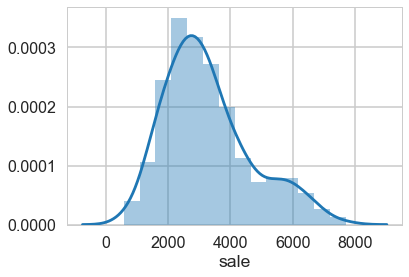

In [63]:
sns.distplot(pretestok['sale'])

In [64]:
col = ['sale']
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 
pretestok[col] =sc.fit_transform(pretestok[col])
pretestok.head()

,sale
2010-12-01,1.743088
2010-12-02,2.195587
2010-12-03,-0.269508
2010-12-05,2.634438
2010-12-06,1.560972


### This is the Time-series data use to analysis.

### Deep Learning model - RNN/LSTM

<font color=black size=4>
>Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.[2]


In [65]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [66]:
dataset = pretestok.values

In [67]:
dataset = dataset.astype('float32')

In [68]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [69]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(237, 60)


In [70]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Activation function


<font color=black size=4>
>First, we use this time-series data as the dataset. And we set the RNN/LSTM model. Use the method to split the dataset in two part, 67% dataset is train dataset and 33% dataset is test dataset. The look back setting we set 1. This mean we use yesterday income to forecast the today income.In RNN/LSTM model, we set activation method with tanh and the layer is 4. Also, the epochs is 204, the batch_size is 1 and the verbose is 2.


In [72]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back),activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0493
Epoch 2/100
 - 0s - loss: 0.0199
Epoch 3/100
 - 0s - loss: 0.0193
Epoch 4/100
 - 0s - loss: 0.0193
Epoch 5/100
 - 0s - loss: 0.0190
Epoch 6/100
 - 0s - loss: 0.0191
Epoch 7/100
 - 0s - loss: 0.0190
Epoch 8/100
 - 0s - loss: 0.0191
Epoch 9/100
 - 0s - loss: 0.0191
Epoch 10/100
 - 0s - loss: 0.0190
Epoch 11/100
 - 0s - loss: 0.0190
Epoch 12/100
 - 0s - loss: 0.0190
Epoch 13/100
 - 0s - loss: 0.0189
Epoch 14/100
 - 0s - loss: 0.0187
Epoch 15/100
 - 0s - loss: 0.0191
Epoch 16/100
 - 0s - loss: 0.0190
Epoch 17/100
 - 0s - loss: 0.0187
Epoch 18/100
 - 0s - loss: 0.0190
Epoch 19/100
 - 0s - loss: 0.0189
Epoch 20/100
 - 1s - loss: 0.0189
Epoch 21/100
 - 1s - loss: 0.0188
Epoch 22/100
 - 0s - loss: 0.0189
Epoch 23/100
 - 0s - loss: 0.0188
Epoch 24/100
 - 0s - loss: 0.0189
Epoch 25/100
 - 0s - loss: 0.0190
Epoch 26/100
 - 0s - loss: 0.0189
Epoch 27/100
 - 0s - loss: 0.0190
Epoch 28/100
 - 0s - loss: 0.0188
Epoch 29/100
 - 0s - loss: 0.0188
Epoch 30/100
 - 0s - lo

In [73]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(testScore)

0.695849341047
1.41496865596


<font color=black size=4>
>And we use ‘model.predict()’ to make the prediction. Then, we use ‘scaler.inverse_transform()’ to transfer the predictions. Last, we use the ‘ math.sqrt()’ to calculate root mean squared error and get test score. Train Score: 0.6958 RMSE, Test Score: 1.4149 RMSE. And then, we shift the test and train predictions for plotting and plot baseline & predictions.


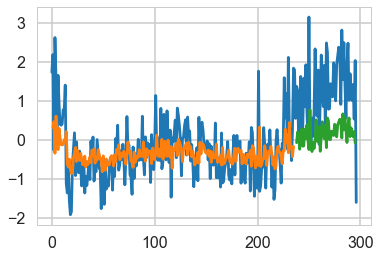

In [74]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Activation function-using diffenrent activation parameter

<font color=black size=4>
>In this prediction graph we can see that the train set is almost like the original data and the test set is has some gap which contrast the original dataset. So, we want to improve our degree of accuracy. The Activation function-using different activation parameter and use different activation method named ‘elu’. 

>Elu function takes care of the Vanishing gradient problem. The other mentioned activation functions are prone to reaching a point from where the gradient of the functions does not change.[3]

>And the results is Train Score: 0.69521 RMSE Test Score: 1.40121 RMSE. We can know that this results is not has obvious different between the ‘tanh’ result.



In [75]:
from keras.layers import Activation, Dense
from keras.layers import LeakyReLU
from keras.layers import PReLU
from keras.layers import ELU            

Epoch 1/204
 - 1s - loss: 0.0598
Epoch 2/204
 - 0s - loss: 0.0205
Epoch 3/204
 - 0s - loss: 0.0200
Epoch 4/204
 - 0s - loss: 0.0198
Epoch 5/204
 - 0s - loss: 0.0197
Epoch 6/204
 - 0s - loss: 0.0195
Epoch 7/204
 - 0s - loss: 0.0194
Epoch 8/204
 - 0s - loss: 0.0193
Epoch 9/204
 - 0s - loss: 0.0192
Epoch 10/204
 - 0s - loss: 0.0192
Epoch 11/204
 - 0s - loss: 0.0191
Epoch 12/204
 - 0s - loss: 0.0191
Epoch 13/204
 - 0s - loss: 0.0189
Epoch 14/204
 - 0s - loss: 0.0191
Epoch 15/204
 - 0s - loss: 0.0190
Epoch 16/204
 - 0s - loss: 0.0189
Epoch 17/204
 - 0s - loss: 0.0189
Epoch 18/204
 - 0s - loss: 0.0189
Epoch 19/204
 - 0s - loss: 0.0190
Epoch 20/204
 - 0s - loss: 0.0190
Epoch 21/204
 - 0s - loss: 0.0190
Epoch 22/204
 - 0s - loss: 0.0189
Epoch 23/204
 - 0s - loss: 0.0189
Epoch 24/204
 - 0s - loss: 0.0190
Epoch 25/204
 - 0s - loss: 0.0189
Epoch 26/204
 - 0s - loss: 0.0189
Epoch 27/204
 - 1s - loss: 0.0188
Epoch 28/204
 - 1s - loss: 0.0189
Epoch 29/204
 - 0s - loss: 0.0190
Epoch 30/204
 - 0s - lo

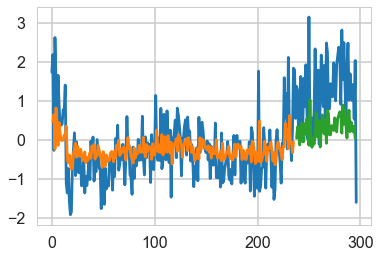

In [76]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back),activation='elu'))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=204, batch_size=1, verbose=2)
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Cost function
 
<font color=black size=4>
>The loss function is applied to just a single training example like so. And the cost function is the cost of your parameters.[4]
 
>So, we use cost function to improve our results and we can see that it’s has good performance. The train score: 0.69986 RMSE, the test score is: 1.31112 RMSE. And contrast the original results, we had improve it 7%.
And then we use the gradient estimation to improve our results. And we found that this method only can improve the results about 3%.



In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.69986 RMSE
Test Score: 1.31112 RMSE


### Change Epochs.We divide all data into two parts and using the 100 Epochs instead of 200.

<font color=black size=4>
>change the epochs will have little positive effect on the result.  if use little epochs will make plateau quickly than before.
 
>We try to change the epochs from 204 to 100, but we found that only small change on the result. It’s not have big effect on the accuracy.
And then, we try to use network architecture and adding a masking layer to model. However, the results is also same like the original result.


Epoch 1/100
 - 1s - loss: 0.0408
Epoch 2/100
 - 0s - loss: 0.0190
Epoch 3/100
 - 0s - loss: 0.0189
Epoch 4/100
 - 0s - loss: 0.0189
Epoch 5/100
 - 0s - loss: 0.0188
Epoch 6/100
 - 0s - loss: 0.0188
Epoch 7/100
 - 0s - loss: 0.0189
Epoch 8/100
 - 0s - loss: 0.0189
Epoch 9/100
 - 0s - loss: 0.0188
Epoch 10/100
 - 0s - loss: 0.0188
Epoch 11/100
 - 0s - loss: 0.0189
Epoch 12/100
 - 0s - loss: 0.0188
Epoch 13/100
 - 0s - loss: 0.0188
Epoch 14/100
 - 0s - loss: 0.0189
Epoch 15/100
 - 0s - loss: 0.0187
Epoch 16/100
 - 0s - loss: 0.0188
Epoch 17/100
 - 1s - loss: 0.0188
Epoch 18/100
 - 0s - loss: 0.0189
Epoch 19/100
 - 0s - loss: 0.0188
Epoch 20/100
 - 0s - loss: 0.0188
Epoch 21/100
 - 0s - loss: 0.0189
Epoch 22/100
 - 0s - loss: 0.0188
Epoch 23/100
 - 0s - loss: 0.0186
Epoch 24/100
 - 0s - loss: 0.0189
Epoch 25/100
 - 0s - loss: 0.0189
Epoch 26/100
 - 0s - loss: 0.0188
Epoch 27/100
 - 0s - loss: 0.0189
Epoch 28/100
 - 0s - loss: 0.0190
Epoch 29/100
 - 0s - loss: 0.0189
Epoch 30/100
 - 0s - lo

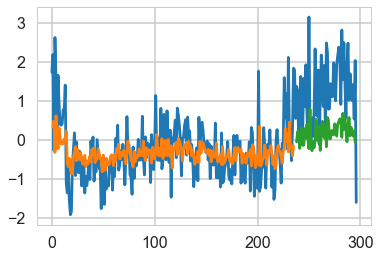

In [79]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model2 = Sequential()
model2.add(LSTM(4, input_shape=(1, look_back),activation='elu'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [80]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.69521 RMSE
Test Score: 1.40121 RMSE


### Gradient estimation

In [81]:
outputTensor = model.output

In [82]:
 listOfVariableTensors = model.trainable_weights

In [83]:
from keras import backend as k
gradients = k.gradients(outputTensor, listOfVariableTensors)


In [84]:
model.input

<tf.Tensor 'lstm_1_input:0' shape=(?, 1, 1) dtype=float32>

In [85]:
import tensorflow as tf
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
trainingExample= np.random.random((1,1,1))
evaluated_gradients = sess.run(gradients,feed_dict={model.input:trainingExample})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch 1/204
 - 1s - loss: 0.0362
Epoch 2/204
 - 0s - loss: 0.0191
Epoch 3/204
 - 0s - loss: 0.0190
Epoch 4/204
 - 0s - loss: 0.0188
Epoch 5/204
 - 0s - loss: 0.0190
Epoch 6/204
 - 0s - loss: 0.0189
Epoch 7/204
 - 0s - loss: 0.0189
Epoch 8/204
 - 0s - loss: 0.0187
Epoch 9/204
 - 0s - loss: 0.0189
Epoch 10/204
 - 0s - loss: 0.0190
Epoch 11/204
 - 0s - loss: 0.0190
Epoch 12/204
 - 0s - loss: 0.0188
Epoch 13/204
 - 0s - loss: 0.0190
Epoch 14/204
 - 0s - loss: 0.0191
Epoch 15/204
 - 0s - loss: 0.0190
Epoch 16/204
 - 0s - loss: 0.0188
Epoch 17/204
 - 0s - loss: 0.0190
Epoch 18/204
 - 0s - loss: 0.0190
Epoch 19/204
 - 0s - loss: 0.0189
Epoch 20/204
 - 0s - loss: 0.0190
Epoch 21/204
 - 0s - loss: 0.0191
Epoch 22/204
 - 0s - loss: 0.0187
Epoch 23/204
 - 0s - loss: 0.0189
Epoch 24/204
 - 0s - loss: 0.0189
Epoch 25/204
 - 1s - loss: 0.0190
Epoch 26/204
 - 1s - loss: 0.0190
Epoch 27/204
 - 0s - loss: 0.0190
Epoch 28/204
 - 0s - loss: 0.0189
Epoch 29/204
 - 0s - loss: 0.0188
Epoch 30/204
 - 0s - lo

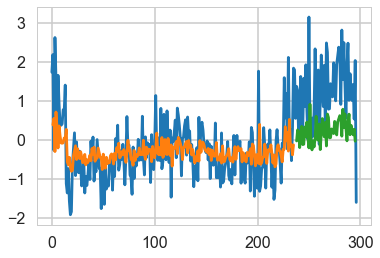

In [86]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back),activation='elu'))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=204, batch_size=1, verbose=2)
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [87]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.69533 RMSE
Test Score: 1.37176 RMSE


### Network Architecture 
<font color=black size=4>
>Network architecture is the design of a communication network. It is a framework for the specification of a network's physical components and their functional organization and configuration, its operational principles and procedures, as well as data formats use.[5]

>Firstly we change Architecture by adding masking layer:

In [88]:
from keras.layers import Masking 

### Network initialization 
Initializations define the way to set the initial random weights of Keras layers:



Epoch 1/204
 - 1s - loss: 0.0604
Epoch 2/204
 - 1s - loss: 0.0208
Epoch 3/204
 - 1s - loss: 0.0196
Epoch 4/204
 - 0s - loss: 0.0194
Epoch 5/204
 - 0s - loss: 0.0194
Epoch 6/204
 - 0s - loss: 0.0195
Epoch 7/204
 - 0s - loss: 0.0193
Epoch 8/204
 - 0s - loss: 0.0193
Epoch 9/204
 - 0s - loss: 0.0193
Epoch 10/204
 - 0s - loss: 0.0192
Epoch 11/204
 - 0s - loss: 0.0192
Epoch 12/204
 - 0s - loss: 0.0191
Epoch 13/204
 - 0s - loss: 0.0191
Epoch 14/204
 - 0s - loss: 0.0190
Epoch 15/204
 - 0s - loss: 0.0193
Epoch 16/204
 - 0s - loss: 0.0190
Epoch 17/204
 - 0s - loss: 0.0191
Epoch 18/204
 - 0s - loss: 0.0190
Epoch 19/204
 - 0s - loss: 0.0189
Epoch 20/204
 - 0s - loss: 0.0189
Epoch 21/204
 - 0s - loss: 0.0190
Epoch 22/204
 - 0s - loss: 0.0188
Epoch 23/204
 - 0s - loss: 0.0189
Epoch 24/204
 - 0s - loss: 0.0189
Epoch 25/204
 - 0s - loss: 0.0190
Epoch 26/204
 - 0s - loss: 0.0188
Epoch 27/204
 - 0s - loss: 0.0188
Epoch 28/204
 - 0s - loss: 0.0188
Epoch 29/204
 - 0s - loss: 0.0188
Epoch 30/204
 - 0s - lo

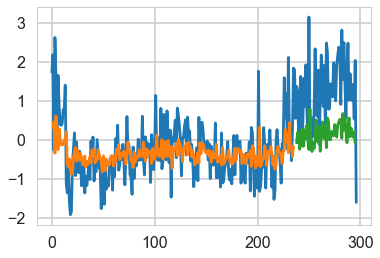

In [89]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, look_back),activation='elu'))
model1.add(Dense(1, 
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX, trainY, epochs=204, batch_size=1, verbose=2)
# make predictions
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [90]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.69577 RMSE
Test Score: 1.41898 RMSE
